In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers

In [4]:
df=pd.read_csv("data.csv",na_values=['NoneUnknown','Unknown','NA','inf'])
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,NaN,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [5]:
high_variance_ubpalanced_col=['mechanical_condition','mechanical_condition','date_posted','steering_side','motors_trim']

In [6]:
df.drop('title',inplace=True,axis=1)

In [8]:
df.drop(high_variance_ubpalanced_col,inplace=True,axis=1)

In [9]:
#df.drop(['title','body_condition','date_posted'],inplace=True,axis=1)

In [10]:
df.duplicated().sum()

302

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
#df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9668 entries, 0 to 9969
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_in_aed       9668 non-null   object 
 1   kilometers         9668 non-null   int64  
 2   body_condition     9668 non-null   object 
 3   seller_type        9668 non-null   object 
 4   body_type          9668 non-null   object 
 5   no_of_cylinders    9554 non-null   object 
 6   transmission_type  9668 non-null   object 
 7   regional_specs     9668 non-null   object 
 8   horsepower         8880 non-null   object 
 9   fuel_type          9668 non-null   object 
 10  year               8741 non-null   float64
 11  color              9668 non-null   object 
 12  emirate            9668 non-null   object 
 13  company            9668 non-null   object 
 14  model              9668 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.2+ MB


In [14]:
def Price_in_aed_To_Int(price):
    num=""
    price_List=price.split(',')
    for i in price_List:
        num+=i
    return int(num)

df['price_in_aed']=df['price_in_aed'].apply(Price_in_aed_To_Int)

<AxesSubplot:xlabel='kilometers', ylabel='Density'>

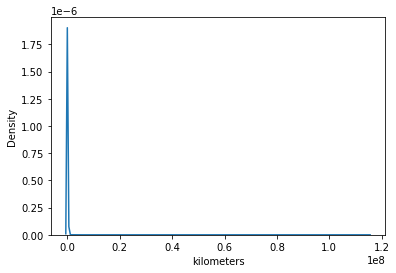

In [15]:
sns.kdeplot(df['kilometers'])

In [16]:
df.drop(df[df['kilometers']>300000].index,inplace=True,axis=0)

<AxesSubplot:xlabel='kilometers', ylabel='Density'>

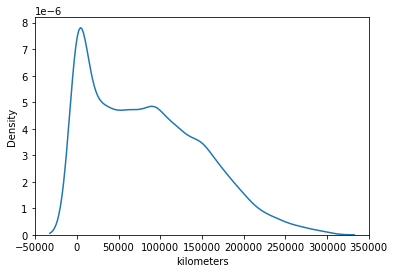

In [17]:
sns.kdeplot(df['kilometers'])

In [18]:
df['year'].astype(int,errors='ignore')

0       2013.0
1       2018.0
2       2014.0
3       2018.0
4       2020.0
         ...  
9965    2015.0
9966    2014.0
9967       NaN
9968    2013.0
9969    2013.0
Name: year, Length: 9571, dtype: float64

In [19]:
df['no_of_cylinders'].unique()

array(['6', '8', '4', '3', '12', '10', 'None', nan, '5'], dtype=object)

In [20]:
df.drop(df[df['no_of_cylinders']=='None'].index,axis=0,inplace=True)

In [21]:
df['no_of_cylinders'].astype(int,errors='ignore')

0       6
1       8
2       6
3       8
4       4
       ..
9965    8
9966    8
9967    8
9968    4
9969    6
Name: no_of_cylinders, Length: 9549, dtype: object

In [23]:
df['company'].value_counts().sort_values().head(29)

other_companies=df['company'].value_counts().sort_values().head(29).index
other_companies=list(other_companies)

In [24]:
print(other_companies)

['maxus', 'saab', 'daihatsu', 'westfield-sportscars', 'ssang-yong', 'dongfeng', 'haval', 'baic', 'smart', 'mercury', 'jac', 'levc', 'buick', 'foton', 'rover', 'morgan', 'polestar', 'acura', 'skoda', 'citroen', 'changan', 'gac', 'mg', 'jetour', 'mercedes-maybach', 'geely', 'genesis', 'other-make', 'opel']


In [25]:
def Handel_Companies(company):
    for c in range(len(other_companies)):
        if company==other_companies[c]:
            return 'other'
    return company

<AxesSubplot:xlabel='count', ylabel='horsepower'>

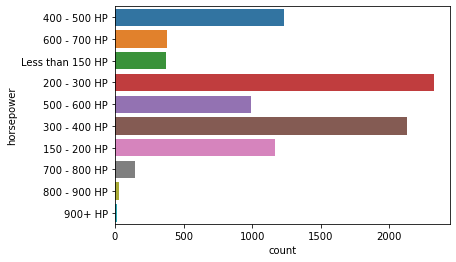

In [27]:
sns.countplot(data =df,y=df['horsepower'])

In [28]:
def Horsepower (horsepower):
    if horsepower == '700 - 800 HP' or horsepower == '800 - 900 HP' or horsepower == '900+ HP':
        return 'More than 700'
    else:
        return horsepower

df['horsepower']=df['horsepower'].apply(Horsepower)

<AxesSubplot:xlabel='count', ylabel='horsepower'>

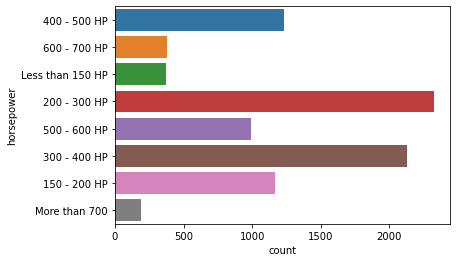

In [29]:
sns.countplot(data =df,y=df['horsepower'])

<AxesSubplot:xlabel='no_of_cylinders', ylabel='count'>

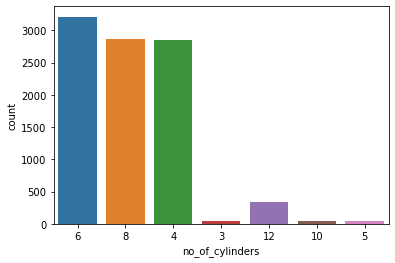

In [30]:
sns.countplot(data=df,x='no_of_cylinders')

In [31]:
not_important_no_of_cylinders_idx=df[(df['no_of_cylinders']=='3') | (df['no_of_cylinders']=='10') | (df['no_of_cylinders']=='5') | (df['no_of_cylinders']=='None')].index

In [32]:
df.drop(not_important_no_of_cylinders_idx,axis=0,inplace=True)

<AxesSubplot:xlabel='no_of_cylinders', ylabel='count'>

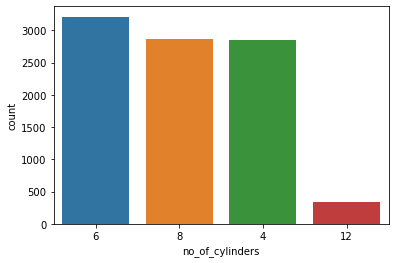

In [33]:
sns.countplot(data=df,x='no_of_cylinders')

In [35]:
df.drop(df[df['year']<=2005].index,inplace=True,axis=0)

<AxesSubplot:xlabel='count', ylabel='year'>

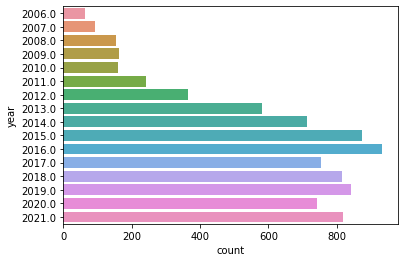

In [36]:
sns.countplot(y=df['year'])

<AxesSubplot:>

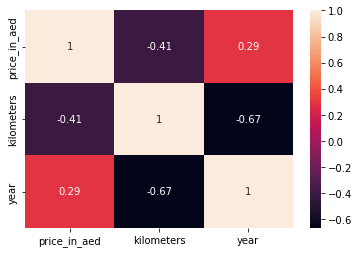

In [37]:
sns.heatmap(df.corr(), annot=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 0 to 9969
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_in_aed       9214 non-null   int64  
 1   kilometers         9214 non-null   int64  
 2   body_condition     9214 non-null   object 
 3   seller_type        9214 non-null   object 
 4   body_type          9214 non-null   object 
 5   no_of_cylinders    9104 non-null   object 
 6   transmission_type  9214 non-null   object 
 7   regional_specs     9214 non-null   object 
 8   horsepower         8487 non-null   object 
 9   fuel_type          9214 non-null   object 
 10  year               8317 non-null   float64
 11  color              9214 non-null   object 
 12  emirate            9214 non-null   object 
 13  company            9214 non-null   object 
 14  model              9214 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.4+ MB


In [40]:
print(list(df['model'].value_counts().sort_values().head(100)))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [41]:
other_model=list(df['model'].value_counts().sort_values().head(150).index)
print(other_model)

['odyssey-j', 'voyagercaravan', 'emgrand-x7-sport', 'clc', '200cev200', 'boxer', 'carens', 'trooper', 'dfsk-v21', 'nitro', 'emgrand-7', '308-gt-lne', 'azure', 'v80', 'rc-f', 'g70', 'grand-marquis', '09-Mar', 'gs7', '458', 'city-bus', 'pajero-sport', 'gran-max', 'evolution', 'xt6', 'ignis', 'b-class', 'm850i', 'town-car', 'h2', 'scaglietti', 'wrangler-4xe', 'zafira', 'express', 'eclipse', 'talisman', 'tx5', 'transporter', 'f430-spider', 'h3', 'p1', 'eqa', 'polo', 'gt-r', 'cx-30', 'qashqai', 'gc6', 'mg5', 'special-edition', 'q2', 'scion', 'a1', 'caravan', 'cx-3', '206cc', 'fabia', 'koup', 'multivan', 'xc40', 'legacy', 'g80', 'ga3', '124-spider', 'rx5', 'centennial', '570s', 'aero-8', '4c', 'hs', 'a200', 'gs4', 'renegade', 'plus-8', 'bolt', 'h9', 'cs75', 'm6', 'baleno', 'journey', 'optra', 'sf90-spider', 'emgrand-gt', 'avanti', 'rapide', 'lc-500', 'xkr', 'dbx', '718-spyder', 'pacifica', 'i10', 'emgrand-8', '5008', 'magnum', 's2000', 'zelas', 'elva', 'clubman', 'bj40l', 'rx8', 's-type', 'e

In [42]:
def Handel_Model(model):
    for c in range(len(other_model)):
        if model==other_model[c]:
            return 'other'
    return model

In [43]:
x=df['model'].apply(Handel_Model)

In [45]:
df['model']=x

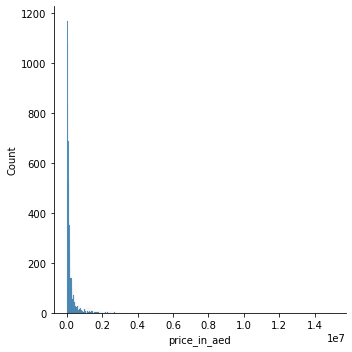

In [46]:
sns.displot(data=df,x=df['price_in_aed'])

In [47]:
df.drop(df[df['price_in_aed']>1500000].index,inplace=True,axis=0)

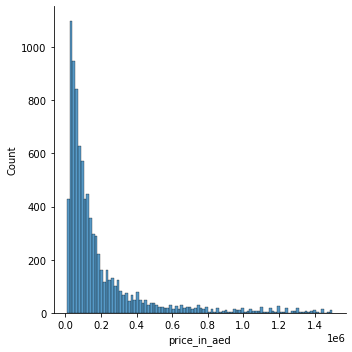

In [48]:
sns.displot(data=df,x=df['price_in_aed'])

In [49]:
df['price_in_aed']=np.log(df['price_in_aed'])

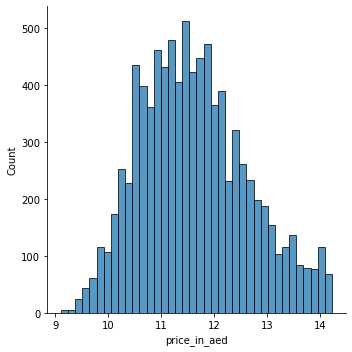

In [50]:
sns.displot(df['price_in_aed'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8976 entries, 0 to 9969
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_in_aed       8976 non-null   float64
 1   kilometers         8976 non-null   int64  
 2   body_condition     8976 non-null   object 
 3   seller_type        8976 non-null   object 
 4   body_type          8976 non-null   object 
 5   no_of_cylinders    8867 non-null   object 
 6   transmission_type  8976 non-null   object 
 7   regional_specs     8976 non-null   object 
 8   horsepower         8251 non-null   object 
 9   fuel_type          8976 non-null   object 
 10  year               8171 non-null   float64
 11  color              8976 non-null   object 
 12  emirate            8976 non-null   object 
 13  company            8976 non-null   object 
 14  model              8976 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.3+ MB


In [52]:
#df.drop('emirate',inplace=True,axis=1)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder,MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [54]:
df.reset_index(inplace=True,drop=True)

In [55]:
imputer=KNNImputer()


In [56]:
x = df.drop("price_in_aed" , axis = 1)
y = df["price_in_aed"]

In [57]:
df_catt=x.select_dtypes(include='object_')
df_catt


,body_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,color,emirate,company,model
0,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,NaN,Gasoline,Silver,Dubai,mitsubishi,pajero
1,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,White,Sharjah,chevrolet,silverado
2,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Blue,Sharjah,mercedes-benz,e-class
3,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Red,Dubai,ferrari,488-spider
4,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,White,Dubai,renault,dokker
...,...,...,...,...,...,...,...,...,...,...,...,...
8971,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,White,Dubai,land-rover,range-rover
8972,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,White,Dubai,cadillac,escalade
8973,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Black,Dubai,land-rover,range-rover-sport
8974,"No accidents, very few faults",Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,White,Dubai,chevrolet,malibu


In [58]:
df_num=x.select_dtypes(include=np.number)
df_num

,kilometers,year
0,167390,2013.0
1,39000,2018.0
2,200000,2014.0
3,27000,2018.0
4,69000,2020.0
...,...,...
8971,105777,2015.0
8972,55640,2014.0
8973,100,NaN
8974,140000,2013.0


In [59]:
df.head(1)

,price_in_aed,kilometers,body_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,year,color,emirate,company,model
0,10.165852,167390,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,NaN,Gasoline,2013.0,Silver,Dubai,mitsubishi,pajero


In [60]:
df['kilometers'].unique()

array([167390,  39000, 200000, ..., 107400, 105777,  55640], dtype=int64)

In [61]:
Cat_Steps = list()
Cat_Steps.append(("imputer" , SimpleImputer(strategy="most_frequent")))
#Cat_Steps.append(("Encoder" , OneHotEncoder(sparse=False , drop="first")))
Cat_Steps.append(("Encoder" , BinaryEncoder()))
Categorical_pipeline = Pipeline(steps = Cat_Steps)

In [62]:
Num_Steps = list()
Num_Steps.append(("imputer" , KNNImputer()))
Num_Steps.append(("scaler" , StandardScaler()))
Num_pipeline = Pipeline(steps = Num_Steps)

In [63]:
Transform = ColumnTransformer(transformers=[("cat",Categorical_pipeline,df_catt.columns) , ("Num",Num_pipeline,df_num.columns)] ,remainder="passthrough")
Transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder', BinaryEncoder())]),
                                 Index(['body_condition', 'seller_type', 'body_type', 'no_of_cylinders',
       'transmission_type', 'regional_specs', 'horsepower', 'fuel_type',
       'color', 'emirate', 'company', 'model'],
      dtype='object')),
                                ('Num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['kilometers', 'year'], dtype='object'))])

In [64]:
final_steps = list()
final_steps.append(("columns",Transform))
#final_steps.append(("scaler" , StandardScaler()))
#final_steps.append(("poly" , PolynomialFeatures(degree=2)))
#final_steps.append(("Model" , LinearRegression()))
final_pipeline = Pipeline(steps = final_steps)

final_pipeline


Pipeline(steps=[('columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   BinaryEncoder())]),
                                                  Index(['body_condition', 'seller_type', 'body_type', 'no_of_cylinders',
       'transmission_type', 'regional_specs', 'horsepower', 'fuel_type',
       'color', 'emirate', 'company', 'model'],
      dtype='object')),
                                                 ('Num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['kilometers', 'year'], dtype='object'))]))])

# Model selection


In [63]:
from sklearn.feature_selection import SequentialFeatureSelector

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
from xgboost.sklearn import XGBRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
def create_model(optimizer='sgd',
                 kernel_initializer='normal'):
    model = Sequential()
    model.add(Dense(12,activation='relu'))
    model.add(Dense(15,activation='relu'))
    model.add(Dense(1,activation='relu',kernel_initializer='normal'))

    model.compile(loss='mean_squared_error',optimizer='sgd', metrics=['mse'])

    return model

In [80]:
ANN = KerasRegressor(build_fn=create_model,verbose=0)

In [81]:
models = list()
models.append(("LR" , LinearRegression()))
models.append(("RandomForestRegressor" , RandomForestRegressor()))
models.append(('GradientBoostingRegressor',GradientBoostingRegressor()))
models.append(("XGBRegressor",XGBRegressor()))
models.append(("SVM" , SVR()))
models.append(('ANN',ANN))

In [82]:
for model in models:
    final_steps = list()
    final_steps.append(("columns",Transform))
    #final_steps.append(("scaler" , StandardScaler()))
    #final_steps.append(("poly" , PolynomialFeatures(degree=2)))

    final_steps.append(model)
    final_pipeline = Pipeline(steps = final_steps)

    scores = cross_validate(final_pipeline , x , y , cv = 5 , scoring='r2' , return_train_score=True)    
    print(model[0])
    print("Train_score" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_score" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")
    

LR
Train_score 0.7667825207853154
----------
Test_score 0.7613655397962503
--------------------


RandomForestRegressor
Train_score 0.9849851203533536
----------
Test_score 0.8926057464959591
--------------------


GradientBoostingRegressor
Train_score 0.8646230060946719
----------
Test_score 0.8508061154702016
--------------------


XGBRegressor
Train_score 0.9797551357133664
----------
Test_score 0.9203162866073935
--------------------


SVM
Train_score 0.9538757665623535
----------
Test_score 0.9222451947215244
--------------------


ANN
Train_score 0.30573396106456946
----------
Test_score 0.3144655381235032
--------------------




# XGBRegressor

In [68]:
from sklearn import metrics


In [85]:
final_steps = list()
final_steps.append(("columns",Transform))
final_steps.append(("XGBRegressor",XGBRegressor()))
final_pipeline = Pipeline(steps = final_steps)

In [86]:
scores = cross_validate(final_pipeline , x , y , cv = 5 , scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error') , return_train_score=True)

In [88]:
scores

{'fit_time': array([0.90956378, 0.91754603, 0.88762617, 0.94247842, 0.89460659]),
 'score_time': array([0.1286552 , 0.12366796, 0.12167311, 0.12566376, 0.13065004]),
 'test_r2': array([0.92539639, 0.914968  , 0.92366201, 0.90839566, 0.92915938]),
 'train_r2': array([0.98022919, 0.98137323, 0.98019457, 0.97961476, 0.97736394]),
 'test_neg_mean_squared_error': array([-0.07701063, -0.09003318, -0.07280699, -0.09244135, -0.07768347]),
 'train_neg_mean_squared_error': array([-0.02035822, -0.01905859, -0.02078591, -0.02111138, -0.02294732]),
 'test_neg_mean_absolute_error': array([-0.20122355, -0.2098549 , -0.19727014, -0.2135075 , -0.20251977]),
 'train_neg_mean_absolute_error': array([-0.10704146, -0.10418469, -0.10830165, -0.10868307, -0.11272888])}

In [91]:
print("train_r2 =",scores["train_r2"].mean())
print('-'*50)
print("test_r2 =",scores["test_r2"].mean())
print('-'*50)
print("test_neg_mean_absolute_error =",abs(scores["test_neg_mean_absolute_error"].mean()))
print('-'*50)
print("test_neg_mean_squared_error =",abs(scores["test_neg_mean_squared_error"].mean()))

train_r2 = 0.9797551357133664
--------------------------------------------------
test_r2 = 0.9203162866073935
--------------------------------------------------
test_neg_mean_absolute_error = 0.20487517456204268
--------------------------------------------------
test_neg_mean_squared_error = 0.08199512425210245


# Tuning

In [348]:
params = [
    
    {   "XGBRegressor__max_depth" : range(5,10) ,
        "XGBRegressor__n_estimators":range(50,200,50),
        "XGBRegressor__learning_rate":[0.04,0.05,0.06,0.07,0.08,0.09]
    }
    
]

In [349]:
grid = GridSearchCV(estimator = final_pipeline , param_grid = params , cv = 5  ,return_train_score=True ,  scoring = "r2" )

In [350]:
grid.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columns',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('Encoder',
                                                                                          BinaryEncoder())]),
                                                                         Index(['seller_type', 'body_type', 'no_of_cylinders', 'transmission_type',
       'regional_specs', 'horsepower', 'color', 'emirate', 'company', 'mode...
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=150,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None,
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             param_grid=[{'XGBRegressor__learning_rate': [0.04, 0.05, 0.06,
                                                          0.07, 0.08, 0.09],
                          'XGBRegressor__max_depth': range(5, 10),
                          'XGBRegressor__n_estimators': range(50, 200, 50)}],
             return_train_score=True, scoring='r2')

In [351]:
grid.best_params_

{'XGBRegressor__learning_rate': 0.09,
 'XGBRegressor__max_depth': 7,
 'XGBRegressor__n_estimators': 150}

In [352]:
grid.cv_results_["mean_train_score"].max()

0.994851559962961

In [353]:
grid.cv_results_["mean_test_score"].max()

0.8996729526617756

# XGBRegressor Tuning

In [69]:
final_steps = list()
final_steps.append(("columns",Transform))
final_steps.append(("XGBRegressor",XGBRegressor(learning_rate=0.09,max_depth=7,n_estimators=150)))
final_pipeline = Pipeline(steps = final_steps)

In [70]:
scores = cross_validate(final_pipeline , x , y , cv = 5 , scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error') , return_train_score=True)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders

In [71]:
scores

{'fit_time': array([2.32593775, 1.4620893 , 1.42019987, 1.26960397, 1.26461673]),
 'score_time': array([0.14162183, 0.14062357, 0.13065076, 0.11967945, 0.12366867]),
 'test_r2': array([0.93040585, 0.91441312, 0.92873255, 0.91527343, 0.93513307]),
 'train_r2': array([0.97287355, 0.97164937, 0.97286314, 0.97488121, 0.9726592 ]),
 'test_neg_mean_squared_error': array([-0.07183954, -0.09062069, -0.06797099, -0.08550074, -0.07113274]),
 'train_neg_mean_squared_error': array([-0.02793239, -0.02900787, -0.02848029, -0.02601354, -0.02771675]),
 'test_neg_mean_absolute_error': array([-0.19856227, -0.21321857, -0.19461372, -0.20344112, -0.19272414]),
 'train_neg_mean_absolute_error': array([-0.12522027, -0.12864428, -0.12679618, -0.12166665, -0.12484254])}

In [72]:
print("train_r2 =",scores["train_r2"].mean())
print('-'*50)
print("test_r2 =",scores["test_r2"].mean())
print('-'*50)
print("test_neg_mean_absolute_error =",abs(scores["test_neg_mean_absolute_error"].mean()))
print('-'*50)
print("test_neg_mean_squared_error =",abs(scores["test_neg_mean_squared_error"].mean()))

train_r2 = 0.9729852945728075
--------------------------------------------------
test_r2 = 0.9247916049398999
--------------------------------------------------
test_neg_mean_absolute_error = 0.2005119665943152
--------------------------------------------------
test_neg_mean_squared_error = 0.07741294065003264


In [73]:
final_pipeline.predict

<bound method Pipeline.predict of Pipeline(steps=[('columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   BinaryEncoder())]),
                                                  Index(['body_condition', 'seller_type', 'body_type', 'no_of_cylinders',
       'transmission_type', 'regional_specs', 'horsepower', 'fuel_type',
       'color', 'emirate', 'company', 'mod...
                              gamma=None, gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.09,
                       

In [74]:
final_pipeline

Pipeline(steps=[('columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   BinaryEncoder())]),
                                                  Index(['body_condition', 'seller_type', 'body_type', 'no_of_cylinders',
       'transmission_type', 'regional_specs', 'horsepower', 'fuel_type',
       'color', 'emirate', 'company', 'mod...
                              gamma=None, gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.09,
                              max_bin=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=150,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, reg_alpha=None,
                              reg_lambda=None, ...))])

In [89]:
final_pipeline.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   BinaryEncoder())]),
                                                  Index(['body_condition', 'seller_type', 'body_type', 'no_of_cylinders',
       'transmission_type', 'regional_specs', 'horsepower', 'fuel_type',
       'color', 'emirate', 'company', 'mod...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.09, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=7, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=150, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [90]:
import joblib


In [91]:
joblib.dump(final_pipeline , "Model.h5")
joblib.dump(x.columns,"input.h5")

['input.h5']

In [92]:
joblib.dump(final_pipeline , "model_test.h5")

['model_test.h5']

In [93]:
#import pickle

In [94]:
#with open ("model_pickle",'wb')as f:
#   pickle.dump(final_pipeline,f)

In [80]:
#with open ("model_pickle",'rb')as f:
#    mp=pickle.load(f)

In [96]:
df.head(2)

,price_in_aed,kilometers,body_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,year,color,emirate,company,model
0,10.165852,167390,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,NaN,Gasoline,2013.0,Silver,Dubai,mitsubishi,pajero
1,11.608236,39000,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,2018.0,White,Sharjah,chevrolet,silverado


In [97]:
input_columns = joblib.load("input.h5")
model = joblib.load("Model.h5")
model

input_columns

test = pd.DataFrame(columns = input_columns)

test.at[0,["kilometers"]]= 39000
test.at[0,["mechanical_condition"]] = 'Perfect inside and out'
test.at[0,["seller_type"]] = "Dealer"
test.at[0,["body_type"]] = "SUV"
test.at[0,["no_of_cylinders"]] = "8"
test.at[0,["transmission_type"]] = "Automatic Transmission"
test.at[0,["regional_specs"]] = "North American Specs"
test.at[0,["horsepower"]] = "400 - 500 HP"
test.at[0,["fuel_type"]] = "Gasoline"
test.at[0,["year"]] = 2018.0
test.at[0,["color"]] = "White"
test.at[0,["emirate"]] = "Sharjah"
test.at[0,["company"]] = "chevrolet"
test.at[0,["model"]] = "silverado"

test

model.predict(test)

array([11.513328], dtype=float32)

In [98]:
model.predict(test)[0]

11.513328

In [100]:
np.exp(model.predict(test)[0])

100040.22